<a href="https://colab.research.google.com/github/danielgomescruz/Meus_estudos/blob/main/Aula_7_DDS4_Fundamentos_de_Machine_Learning_dgc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 7 - DDS4 - Fundamentos de Machine Learning**

## **Importação dos Dados de Custos Médicos**

In [ ]:
#lendo do github do professor 

import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# via ambiente de trabalho

#caminho = '/content/insurance.csv'
#dados = pd.read_csv(caminho)
#dados.head()

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


---

## **Análise Exploratória dos Dados** 

In [ ]:
# instalando biblioteca de visualização !roda aqui 

!pip install sweetviz 

In [ ]:
import sweetviz as sv

In [ ]:
eda = sv.analyze(source = dados, target_feat = 'charges')

AttributeError: ignored

In [ ]:
eda.show_notebook()

NameError: ignored

In [ ]:
eda2 = sv.compare_intra(source_df = dados,
                              condition_series = dados['sex'] == 'male',
                              names = ['Masculino', 'Feminino'],
                              target_feat = 'smoker')

In [ ]:
eda2.show_notebook()
#eda2.show_html(layout = 'vertical')

---

## **_Mise en place_ para Modelagem**

Em Machine Learning, em geral, todas as variáveis do conjunto de dados que será utilizado precisam ser númericas. É também interessante que o intervalo de variabilidade das variáveis contínuas não seja tão grande e esteja próximo de zero. 

Para tanto, façamos as seguintes transformações:

- Transformar a variável smoker em 0 (não) ou 1 (sim)
- Colocar a variável resposta na escala para cada mil dolares

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0}) #transformando para dados numericos
dados['charges'] = dados['charges']/1000 #aproximacao de escala

Nessa análise, a princípio, vamos considerar as variáveis: charges, bmi e smoker.

In [ ]:
dados = dados[['bmi', 'smoker', 'charges']] #para prever charges (var numerica)
dados.head()                                #para prever smoker (categorica)

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


Veja essas variáveis no gráfico de dispersão:

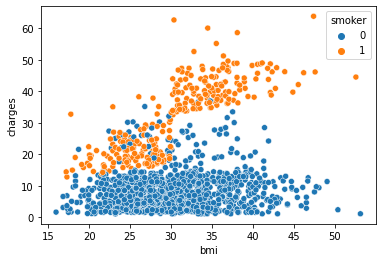

In [ ]:
import seaborn as sns

#sns.scatterplot(x = 'bmi', y = 'charges', data = dados);
sns.scatterplot(x = 'bmi', y = 'charges', data = dados, hue = 'smoker');

---

## **Nosso Primeiro Modelo de Machine Learning**

In [ ]:
from sklearn.linear_model import LinearRegression #sklearn = ml

# Modelo para prever a variável CHARGES a partir da BMI

X = dados[['bmi']] #varialvel explicativa [[]]df
y = dados['charges'] #variavel resposta []series, funciona com os dois

regressao = LinearRegression() #definindo o modelo
regressao.fit(X, y) #ajustando o modelo, achar beta 0 e beta 1
#aqui ja finalizamos o modelo, mas nao e so isso...

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Nesse cenário, o modelo de regressão linear é dado por

 **CUSTOS = b0 + b1 * IMC**

In [ ]:
# Resgatando os coeficientes ajustados

print('b0 = ', regressao.intercept_) #me da o beta 0
print('b1 = ', regressao.coef_ [0] ) #me da o beta 1
X

b0 =  1.1929372089611512
b1 =  0.3938730307973951


,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880
...,...
1333,30.970
1334,31.920
1335,36.850
1336,25.800


In [ ]:
#usando o modelo em dados novos
# Usando o modelo de regressão linear na prática

novos_dados = pd.DataFrame({'bmi': [15, 22, 28, 33, 40, 45]}) #fazer a previsao do charge usando bmi de 4 pessoas 15, 22, 28, 33
regressao.predict(novos_dados) #mesmo tamanho e mesmo numero de colunas. O predict e fazer a predicao propriamente dita 
#resposta em mil dolares

array([ 7.10103267,  9.85814389, 12.22138207, 14.19074723, 16.94785844,
       18.91722359])

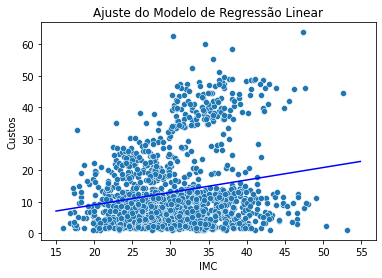

In [ ]:
#dando uma olhadinha pra ver como ficou
# Gráfico do Ajuste

b0 = regressao.intercept_
b1 = regressao.coef_

import numpy as np
pontos_em_x = np.arange(15, 55, 0.1) #um monte de pontinhos intercalados no intervalo do bmi
pontos_em_y = b0 + b1 * pontos_em_x #calcula o valor da reta pra todos os pontos em x 

sns.scatterplot(x = 'bmi', y = 'charges', data = dados) #plotar os pontos

import matplotlib.pyplot as plt

plt.plot(pontos_em_x, pontos_em_y, color = 'blue') #faz a linha de tendencia
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show() #a reta indica que nao e um bom modelo de regressao, pois os pontos estao muito dispersos da reta
#corre um grande risco em colocar o modelo em producao, pois nem sei o quanto o modelo esta errando

**Pronto, fizemos nosso modelo.** 

**Acabou Machine Learning.**

...

**Será?**

---

## **Métrica para Avaliação do Modelo**

In [ ]:
# Erro Quadrático Médio

preditos = regressao.predict(X) #conjunto de treino
eqm = ((y - preditos) ** 2).mean() #real - predito ao quadrado

from sklearn.metrics import mean_squared_error #funcao pronta pra calcular o erro quadratico medio
eqm = mean_squared_error(y, preditos)

print('EQM da Regressão Linear: {}'.format(round(eqm, 2))) #serve para se comparar modelos, quanto < melhor
#na pomba e o 95% :), pois usei o conjunto de treino

EQM da Regressão Linear: 140.78


---

## **Estratégia de Validação do Modelo**

In [ ]:
# Técnica HOLDOUT
from sklearn.model_selection import train_test_split #divisao teste/treino

In [ ]:
train_test_split(X, y, test_size = 0.25) #25 teste e 75 treino

[         bmi
 1005  31.730
 406   24.310
 972   20.235
 970   28.160
 577   38.095
 ...      ...
 885   28.930
 389   30.210
 314   31.400
 1091  29.830
 1098  30.875
 
 [1003 rows x 1 columns],          bmi
 1224  23.940
 502   23.210
 1089  22.100
 1299  25.745
 414   35.150
 ...      ...
 1026  26.030
 822   31.130
 221   33.250
 944   39.930
 457   30.495
 
 [335 rows x 1 columns], 1005     4.433388
 406      4.185098
 972      2.527819
 970     10.702642
 577     58.571074
           ...    
 885     19.719695
 389      4.618080
 314     34.838873
 1091    11.286539
 1098    23.045566
 Name: charges, Length: 1003, dtype: float64, 1224     6.858480
 502     22.218115
 1089    10.577087
 1299     2.710829
 414      2.134901
           ...    
 1026    16.450895
 822      1.621883
 221     10.564884
 944     12.982875
 457     11.840775
 Name: charges, Length: 335, dtype: float64]

In [ ]:
# Separe os dados em teste e treino 
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)
#NAO USAR PARAMETRO PARA FIXAR, ISSO E ERRADO!!! O HOLDOUT APRESENTA ESSE PROBLEMA, POIS A RESPOSTA VARIA MUITO

# Ajuste do modelo nos dados de TREINO
regressao = LinearRegression()
regressao.fit(Xtreino, ytreino)
#treinei o modelo

# Utilize o modelo ajustado para predizer os dados de TESTE
preditos = regressao.predict(Xteste) 
#testei o modelo

# Calcule o Erro Quadrático Médio nos dados de TESTE 
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))
#deu maior do que 140.78 que foi com o conjunto de treino

EQM : 137.43


In [ ]:
print(Xtreino.shape)
print(Xteste.shape)

(1003, 1)
(335, 1)


**O método Holdout produz resultados com uma certa variabilidade, o que causa incerteza sobre o real valor do EQM do modelo**

**Como resolver?**

---

## **Alimentação do Modelo com mais Informações!**

In [ ]:
# Considerando o modelo com DUAS variáveis preditoras

X = dados[['bmi', 'smoker']] #agora com duas variaveis
y = dados['charges']

Nesse cenário, o modelo de regressão linear é dado por

 **CUSTOS = b0 + b1 * IMC + b2 * FUMANTE**

In [ ]:
# Repetindo o procedimento de Validação HOLDOUT
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
regressao = LinearRegression()
regressao.fit(Xtreino, ytreino)
preditos = regressao.predict(Xteste)
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

#muito menor do que o 141.94 com somente uma variavel
#quando alimenta o modelo com boa informacao, ganha-se muita performance


EQM : 53.0


In [ ]:
# Coeficientes
b0 = regressao.intercept_
b1, b2 = regressao.coef_
print('b0 = ', b0)
print('b1 = ', b1)
print('b2 = ', b2)

#uso pra calcular y chapeu

b0 =  -5.139706972049153
b1 =  0.43573471695650234
b2 =  23.72402929423816


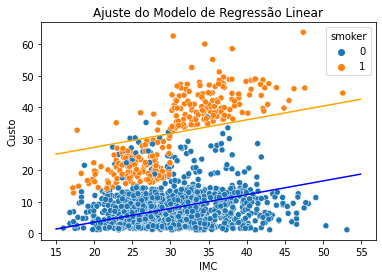

In [ ]:
# Gráfico do Ajuste com DUAS Variáveis

x = np.arange(15, 55, 0.1)
y0 = b0 + b1 * x + b2 * 0 #reta para quando o smoker = 0
y1 = b0 + b1 * x + b2 * 1 #reta para quando o smoker = 1

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

#adicionar mais variaveis e analisar o eqm
#precisamos repetir varias vezes o holdout para variar o conjunto de dados de treino e teste
#o problema da regressao linear e a reta!

---

## **Exercício Proposto**

Faça repetições da técnica Holdout, de maneira a variar os dados que ficam no conjunto de treino e teste. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter uma valor mais estável para o EQM.

---

In [ ]:
from sklearn.model_selection import train_test_split #sklearn = ml
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

R = 100000
eqms = []

for i in range(R):
  # Separe os dados em teste e treino 
  Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)
  #NAO USAR PARAMETRO PARA FIXAR, ISSO E ERRADO!!! O HOLDOUT APRESENTA ESSE PROBLEMA, POIS A RESPOSTA VARIA MUITO

  # Ajuste do modelo nos dados de TREINO
  regressao = LinearRegression()
  regressao.fit(Xtreino, ytreino)
  #treinei o modelo

  # Utilize o modelo ajustado para predizer os dados de TESTE
  preditos = regressao.predict(Xteste) 
  #testei o modelo

  # Calcule o Erro Quadrático Médio nos dados de TESTE 
  eqm = mean_squared_error(yteste, preditos)
  eqms.append(eqm)
np.mean(eqms)
#para R repeditocoes conseguimos uma resposta mais estavel(Holdout repetido)

50.47472510829052